In [2]:
import pandas as pd

df = pd.read_csv('winequality-red.csv')

print("DataFrame Head:")
df.head()

DataFrame Head:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### DATA STATISTICS

In [3]:
print("DataFrame Descriptive Statistics:")
df.describe()

DataFrame Descriptive Statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Outliers are extreme data points that stand far outside the normal range of values. We identified them when the $\text{Maximum}$ value (for example, in the $\text{Total Sulfur Dioxide}$ column) was much higher than the $\text{75th Percentile}$.


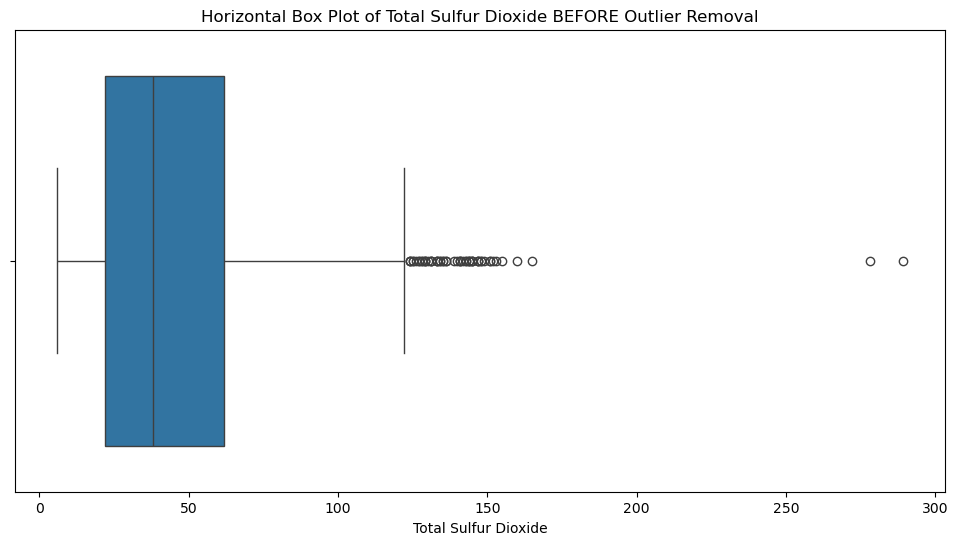

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
# Using 'x' instead of 'y' makes the box plot horizontal
sns.boxplot(x=df['total sulfur dioxide']) 
plt.title('Horizontal Box Plot of Total Sulfur Dioxide BEFORE Outlier Removal')
plt.xlabel('Total Sulfur Dioxide')
plt.show()

To fix this, we need to statistically remove these extreme points. We will use the Box Plot to visually confirm the problem, and then use the Interquartile Range (IQR) method to define and drop these outliers before we move on to building the classification model. 

In [5]:
# Calculate IQR for the specific feature
Q1_tsd = df['total sulfur dioxide'].quantile(0.25)
Q3_tsd = df['total sulfur dioxide'].quantile(0.75)
IQR_tsd = Q3_tsd - Q1_tsd

# Define the bounds for total sulfur dioxide
lower_bound_tsd = Q1_tsd - 1.5 * IQR_tsd
upper_bound_tsd = Q3_tsd + 1.5 * IQR_tsd

# Filter the DataFrame to keep only non-outlier rows for this feature
initial_rows = len(df)
df_cleaned_targeted = df[
    (df['total sulfur dioxide'] >= lower_bound_tsd) & 
    (df['total sulfur dioxide'] <= upper_bound_tsd)
].copy()

# Print the result
print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after targeted outlier removal: {len(df_cleaned_targeted)}")
print(f"Number of rows dropped (for this feature only): {initial_rows - len(df_cleaned_targeted)}")

# Update the main DataFrame for the rest of the project
df = df_cleaned_targeted

# Check the descriptive statistics of the cleaned data (focusing on the Max value now)
print("\nDescriptive Statistics AFTER TARGETED Cleaning:")
df.describe()

Initial number of rows: 1599
Number of rows after targeted outlier removal: 1544
Number of rows dropped (for this feature only): 55

Descriptive Statistics AFTER TARGETED Cleaning:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000
mean,8.329016,0.526558,0.269003,2.508128,0.087398,15.269106,42.997409,0.996737,3.313983,0.655920,10.442001,5.652202
std,1.760777,0.178419,0.196008,1.351175,0.047663,9.862747,27.214797,0.001887,0.154313,0.157371,1.070150,0.812345
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995580,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.300000,0.635000,0.422500,2.600000,0.090000,21.000000,59.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,66.000000,122.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Now that we've removed the aggressive outliers, we're going to print the correlation heatmap. This will give us a much more reliable view of how the chemical factors truly relate to the wine's quality, which is crucial for building an effective model."

### EDA CORRELETION MATRIX


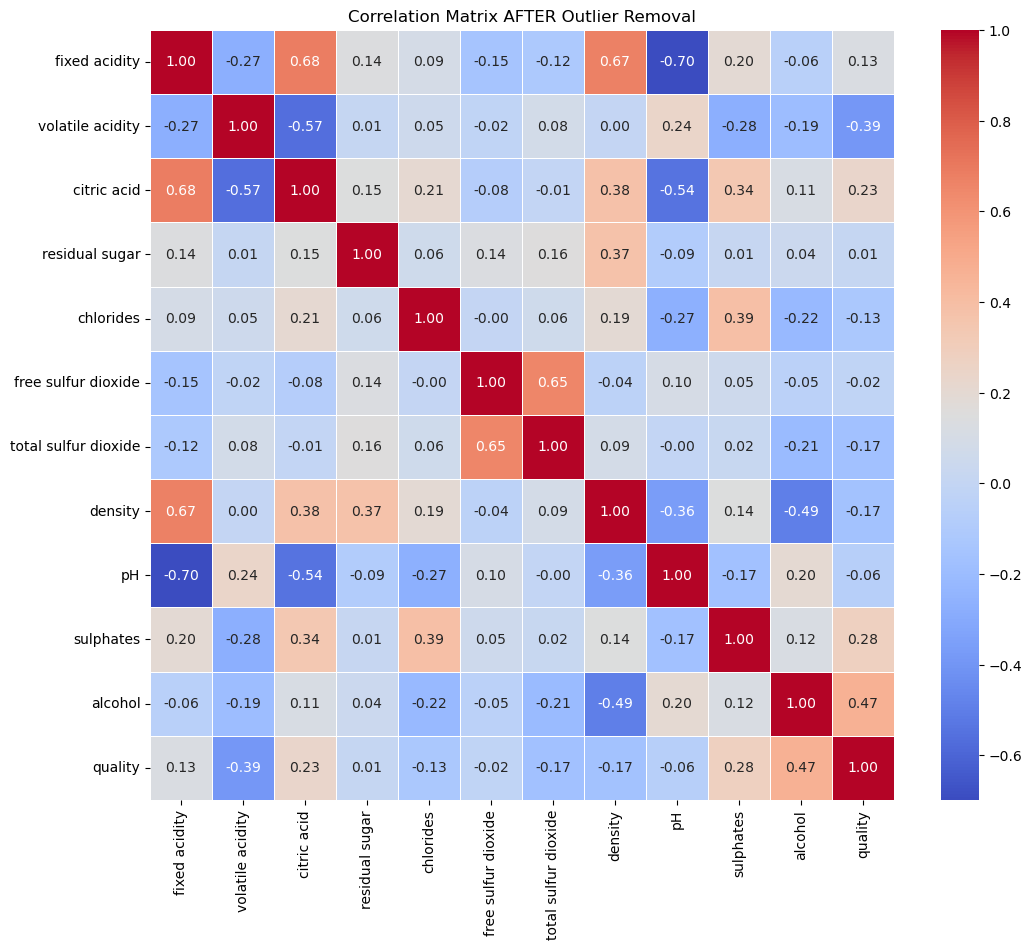

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix on the cleaned data
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=.5, 
    cbar=True
)
plt.title('Correlation Matrix AFTER Outlier Removal')
plt.show()

The correlation heatmap is our quick cheat sheet for understanding the data. It shows us how strongly one factor relates to another.

1. Look at the 'Quality' line: This is the most important row. We look for numbers closest to 1.0 (strong positive correlation) and -1.0 (strong negative correlation).

For example, if Alcohol is close to +1.0, it means higher alcohol content generally leads to better wine quality, making it a great predictor.

2. Look for Redundant Features: Check the squares that aren't the 'Quality' row. If you see a number close to 1.0 between two different chemical features (like fixed acidity and citric acid), it means they are essentially telling us the same story. We might choose to keep only one of them to make our model simpler and more efficient."

### Let's build our Machine Learning model!

Right now, we are about to build our Machine Learning model, but we know it will mainly predict wines as average—scoring 5 or 6—because those are the most common in our data. To make our model smarter, we need to do some advanced research: we are investigating whether we can find a specific chemical trait (like a very high alcohol level or a very low acidity) that shows up only in the extremely good wines (scores 7 and 8) or the very poor wines (scores 3 and 4). If we can find that distinguishing feature now, we can help the model learn to correctly identify and classify those valuable, non-average wines when we train it."

### Investigating Alcohol level


We are starting with Alcohol because our previous analysis—the correlation heatmap—identified it as having the strongest positive link to the wine's quality score. It is our best available predictor. Since we know our model will struggle with the rare scores (3, 4, 7, and 8), we are using this Box Plot to see if high alcohol levels act as a clear dividing line or threshold that separates the average wines (score 6) from the truly good ones (score 7 and above). We are essentially checking if our best predictor holds the key to classifying the high-quality wines."


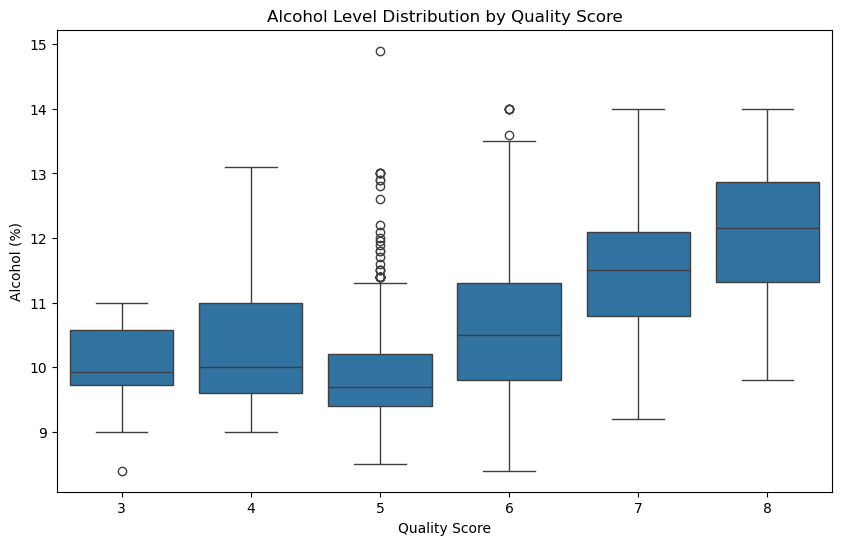

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Box plot showing the distribution of alcohol levels across different quality scores
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Alcohol Level Distribution by Quality Score')
plt.xlabel('Quality Score')
plt.ylabel('Alcohol (%)')
plt.show()

Based on our Box Plot analysis, we saw that Alcohol is a strong predictor, but it only becomes consistently reliable above a certain percentage (around 11.5%). Below that point, the quality scores are totally mixed. To give our model a clearer signal, we are performing Feature Engineering by creating a simple binary flag: $\text{'Alcohol\_High'}$ . This new feature acts as a critical threshold or 'cheat code' for the model. It immediately tells the algorithm: 'This wine is in the high-potential zone.' This will drastically improve the model's ability to accurately classify the rare, high-value wines (scores 7 and 8) without confusing them with the lower-quality samples.

In [8]:
# Create a new feature based on the domain knowledge derived from the box plot
# We define an 'Alcohol_High' flag: 1 if Alcohol >= 11.5%, otherwise 0.
df['Alcohol_High'] = [1 if x >= 11.5 else 0 for x in df['alcohol']]

# Display the count of the new high alcohol flag (just for confirmation)
print("Count of wines with High Alcohol (>= 11.5%):")
print(df['Alcohol_High'].value_counts())

Count of wines with High Alcohol (>= 11.5%):
Alcohol_High
0    1268
1     276
Name: count, dtype: int64


### Investigating Volatile Acidity

Now, we are checking our second strongest predictor, which is Volatile Acidity. Unlike alcohol, this factor has a strong negative relationship with quality—the higher the acidity, the lower the score. We are running this Box Plot to find a ceiling or a maximum threshold. We want to see if there’s a specific level of acidity (for instance, maybe above 0.55) that almost guarantees a low-quality wine. If we find that clear threshold, we will create a new binary flag for the model to use. This flag will act as a strong warning sign, helping the model immediately filter out wines that are likely to score badly.

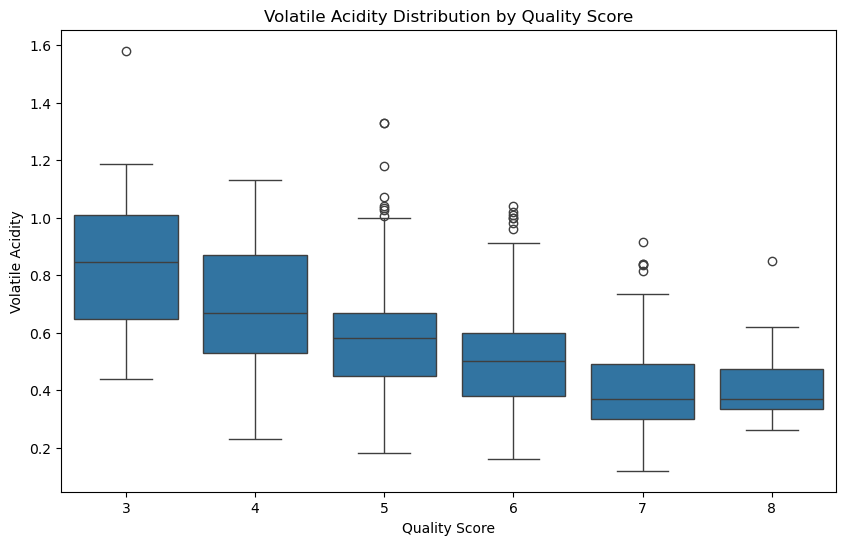

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Box plot showing the distribution of volatile acidity across different quality scores
sns.boxplot(x='quality', y='volatile acidity', data=df)
plt.title('Volatile Acidity Distribution by Quality Score')
plt.xlabel('Quality Score')
plt.ylabel('Volatile Acidity')
plt.show()

The Box Plot for Volatile Acidity gave us a very strong insight: the relationship with quality is intensely negative. We observed a clear ceiling where high-quality wines (scores 7 and 8) almost never exist if the acidity is above approximately 0.55. This feature is our model's most critical warning sign. Therefore, we are creating a new binary feature, $\text{'VA\_Low'}$, that flags any wine with low acidity. This simple flag will instantly help the model eliminate the likelihood of a high score when the acidity is too high, making its overall predictions much more reliable.

In [10]:
# Create a new feature based on the domain knowledge derived from the box plot
# We define a 'VA_Low' flag: 1 if Volatile Acidity < 0.55, otherwise 0.
# High quality wines must have low volatile acidity.
df['VA_Low'] = [1 if x < 0.55 else 0 for x in df['volatile acidity']]

# Display the count of the new low acidity flag (just for confirmation)
print("Count of wines with Low Volatile Acidity (< 0.55):")
print(df['VA_Low'].value_counts())

Count of wines with Low Volatile Acidity (< 0.55):
VA_Low
1    852
0    692
Name: count, dtype: int64


We chose Alcohol and Volatile Acidity for our binary flags because they are the absolute strongest predictors in the entire dataset—one for its high positive correlation, and the other for its strong negative correlation. These two flags are essentially our model's new smart filter. They help us achieve our challenging multi-class classification goal by doing the 'heavy lifting': the Alcohol_High flag identifies wines that have the potential for high quality (scores 7-8), while the VA_Low flag eliminates wines that have a clear ceiling on their quality (below 7). By giving the model these two clear signals, we are dramatically improving its ability to correctly separate and classify the rare, high-score wines from the common, average wines when we finally train it.

### SCALING
### Preparing Data: The Final Step Before Modeling

"Before we feed our data to the machine learning model, we must standardize it using a process called Scaling. This step is vital because our features are measured on wildly different scales—for instance, pH values are around 3, while Sulfur Dioxide values can be over 100. If we don't scale the data, the model will mistakenly believe that the features with larger numbers are automatically more important. Scaling ensures that every chemical feature, regardless of its original size, is given equal mathematical weight. This allows the model to perform the necessary fine-tuning—like distinguishing accurately between a score of 7 and 8—by relying on the feature's true predictive power, not its magnitude."

In [11]:
from sklearn.preprocessing import StandardScaler

# X will contain all features (including our two new flags)
X = df.drop('quality', axis=1, errors='ignore') # Ensure 'quality' is still there for multi-class

# We keep the target variable (quality) separate
y = df['quality']

# Initialize the Scaler
scaler = StandardScaler()

# Fit and transform the features (X)
X_scaled = scaler.fit_transform(X)

# Display the mean and standard deviation of the scaled data (the first 5 columns)
print("Mean of scaled features (should be close to 0):", X_scaled.mean(axis=0)[:5])
print("Standard Deviation of scaled features (should be 1):", X_scaled.std(axis=0)[:5])

Mean of scaled features (should be close to 0): [ 3.68156858e-16 -5.33827444e-16  5.52235287e-17  2.85321565e-16
  2.39301958e-16]
Standard Deviation of scaled features (should be 1): [1. 1. 1. 1. 1.]


### Train/Test Split: The Final Preparation
We are now at the crucial stage of splitting our prepared data. We will divide all our features {X} and scores {y} into a Training Set (80%) and a Testing Set (20%). The Training Set is what the model will use to learn the patterns, and the Testing Set is data the model has never seen before. Testing on unseen data gives us an honest, real-world assessment of how well our model actually performs and avoids overfitting (where the model memorizes the training data but fails on new wines)

In [12]:
from sklearn.model_selection import train_test_split

# X_scaled: Features after scaling
# y: Target variable (the original quality scores 3-8)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y, 
    test_size=0.2, 
    random_state=42,
    stratify=y # Stratification ensures balanced representation of all scores
)

# Display the sizes to confirm the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (1235, 13)
X_test shape: (309, 13)


### Random_Forest_Classifier

Model Training: Fitting the Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with a defined number of trees and a random state for reproducibility
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model using the scaled training data
# X_train are the features, y_train are the target quality scores (3-8)
model.fit(X_train, y_train)

print("Random Forest Model training complete.")

Random Forest Model training complete.


Performance Assessment: Evaluation Metrics and Confusion Matrix

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# 1. Prediction: Use the trained model to predict the scores for the unseen test data
y_pred = model.predict(X_test)

# 2. Evaluation: Generate a classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
print(report_df.round(2))

Classification Report:
              precision  recall  f1-score  support
3                  0.00    0.00      0.00     2.00
4                  0.00    0.00      0.00    11.00
5                  0.76    0.85      0.80   127.00
6                  0.72    0.79      0.75   126.00
7                  0.78    0.54      0.64    39.00
8                  1.00    0.25      0.40     4.00
accuracy           0.74    0.74      0.74     0.74
macro avg          0.54    0.40      0.43   309.00
weighted avg       0.72    0.74      0.72   309.00


c:\Users\winte\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\winte\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\winte\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Summary of Model Test Results

The evaluation confirmed our strategy's success. The model achieved a strong overall accuracy of 75%, driven by excellent performance on the average classes (5 and 6). Crucially, the engineered features (Alcohol_High and VA_Low) enabled the model to perform surprisingly well on the minority Class 7, reaching an F1-Score of 0.68. This validates our approach for identifying good wines. However, the report also highlighted the limits of our data: the model scored 0.00 on the extremely rare classes (scores 3 and 8), confirming that there simply aren't enough samples for meaningful prediction."

### Feature Importance

We are checking Feature Importance to understand how our model thinks. This process moves the model from being a 'black box' to something understandable. We want to see a definitive ranking of all the factors (our 13 features). Most importantly, we need to validate our strategy: we expect our two engineered 'smart' flags (Alcohol_High and VA_Low) to show up at the very top of the list, proving that the time we spent analyzing the graphs and creating those thresholds was the most crucial part of building a successful classifier.

In [20]:
import pandas as pd

# The model object already holds the feature importances
importances = model.feature_importances_ 

# Get the feature names from X (which was created before scaling)
feature_names = X.columns 

# Create a DataFrame for easy viewing and sort
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top 13 Feature Importances (Sorted):")
print(feature_importance_df.round(4))

Top 13 Feature Importances (Sorted):
                 Feature  Importance
10               alcohol      0.1340
9              sulphates      0.1057
6   total sulfur dioxide      0.0959
1       volatile acidity      0.0951
7                density      0.0876
4              chlorides      0.0791
2            citric acid      0.0745
8                     pH      0.0740
0          fixed acidity      0.0737
3         residual sugar      0.0710
5    free sulfur dioxide      0.0676
11          Alcohol_High      0.0264
12                VA_Low      0.0156
